# **LAPORAN PRAKTIKUM WEB DATA ACQUISITION**

**Nama: Nafisahika Putri Herra**

**NIM: 164221039**

**Tugas Praktikum:**
- Web Scrapping 1 halaman Unair News dan Judul Berita yang ada hari ini.
- Web Crawling Unair News untuk mengambil judul berita dari kategori featured news
- Web Crawling website https://bit.ly/scrapingtry dan menyimpan judul game beserta harganya dalam tabel
- GitHub https://github.com/nfshk/WebDataAcquisition


## Web Scrapping

In [1]:
import requests
from bs4 import BeautifulSoup
import csv

file = open("UnairNews_Scrapping.csv", "w")
fill = csv.writer(file)
fill.writerow(["Date","Title","Link"])

17

**Baris 1:** Mengimport atau memanggil library request untuk mengirimkan request HTTP ke server situs web.

**Baris 2:** Memanggil library BeautifulSoup untuk menunjang proses scrapping atau lebih tepatnya, library ini berfungsi untuk mengakses HTML dan mengambil data.

**Baris 3:** Mengimport atau memanggil library csv dengan tujuan agar file dapat secara otomatis menjadi file csv

**Baris 5-7:** Terdapat variabel file dengan perintah open dengan parameter nama file dan w. File diberi judul Scrapping_UnairNews.csv. Artinya, file Scrapping_UnairNews.csv terbuka dan output dapat disesuaikan dengan tujuan. Selanjutnya, pada **baris 7** merupakan *syntax* untuk memberi nama kolom. Kolom akan diberi nama Date, Title dan Link.

In [2]:
response = requests.get('https://unair.ac.id/news/')
rawhtml = response.text
rawhtml

'\n<!DOCTYPE html>\n<html lang="id-ID">\n<head>\n\t<meta charset="UTF-8">\n\t\t<meta name=\'robots\' content=\'index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1\' />\n<link rel="alternate" hreflang="id" href="https://unair.ac.id/news/" />\n<link rel="alternate" hreflang="en" href="https://unair.ac.id/en/unair-news/" />\n<link rel="alternate" hreflang="x-default" href="https://unair.ac.id/news/" />\n\n\t<!-- This site is optimized with the Yoast SEO plugin v21.5 - https://yoast.com/wordpress/plugins/seo/ -->\n\t<title>UNAIR NEWS</title>\n\t<meta name="description" content="UNAIR NEWS adalah satuan kerja di bawah Pusat Komunikasi dan Informasi Publik (PKIP) Universitas Airlangga yang berfokus menyediakan berita." />\n\t<link rel="canonical" href="https://unair.ac.id/news/" />\n\t<meta property="og:locale" content="id_ID" />\n\t<meta property="og:type" content="article" />\n\t<meta property="og:title" content="UNAIR NEWS" />\n\t<meta property="og:description" co

**Baris 1-2:** Variabel response memiliki value berupa respon yang dikirimkan oleh server. Pada baris berikutnya adalah variabel html yang berisi syntax untuk membaca respon html. Dengan kata lain, baris kedua berfungsi untuk menjadikan respon menjadi interface.

**Baris 3:** Berfungsi untuk menampilkan variabel html yang berisi respon html.

In [3]:
soup = BeautifulSoup(rawhtml, 'html.parser')

for news,date in zip(soup.find_all("h2"), soup.find_all("span",{"class":"elementor-post-date"})):
    title = news.get_text().strip('\n\t')
    print(title)
    link = news.a.get("href")
    print(link)
    date = date.get_text().strip('\n\t')
    print(date)
    fill.writerow([date, title, link])

file.close()

Websvaganza 2023 Hadirkan Bazar Kosmetik untuk Dorong Kepercayaan Diri dan Hilangkan Insecure
https://unair.ac.id/websvaganza-2023-hadirkan-bazar-kosmetik-untuk-dorong-kepercayaan-diri-dan-hilangkan-insecure/
02/11/2023
Mahasiswa UNAIR Sabet Juara 1 Kategori Lomba Infografis KOMINFO Jawa Timur
https://unair.ac.id/mahasiswa-unair-sabet-juara-1-kategori-lomba-infografis-kominfo-jawa-timur/
03/11/2023
Pentingnya Mengenal Potensi Diri Melalui Pemahaman Emosional
https://unair.ac.id/pentingnya-mengenal-potensi-diri-melalui-pemahaman-emosional/
03/11/2023
Dukung Pendidikan Merata UNAIR Berikan Beasiswa Siswa Sekolah Dasar
https://unair.ac.id/dukung-pendidikan-merata-unair-berikan-beasiswa-siswa-sekolah-dasar/
03/11/2023
Apa Sih UKM Wanala ?
https://unair.ac.id/apa-sih-ukm-wanala/
03/11/2023
Ancam Boikot SpaceX, Dosen UNAIR Sebut Israel Tidak Ingin Aksi Genosida Diketahui Dunia Luar
https://unair.ac.id/ancam-boikot-spacex-dosen-unair-sebut-israel-tidak-ingin-aksi-genosida-diketahui-dunia-luar

**Baris 1:** Variabel soup berisi *syntax* untuk menyimpan file HTML sehingga memungkinkan untuk dilakukan penelusuran atau pencarian elemen HTML. 

**Baris 3-8:** Terdapat perulangan for yang mendefinisikan variabel news sebagai seluruh pencarian tag "h3" oleh fungsi .find_all("h3") dan variabel date sebagai seluruh pencarian penelusuran span dengan class elementor-post-date. Metode ini dinamakan parallel loops. 
- **Baris 4-5** adalah variabel title. Variabel ini akan menyimpan text yang berada si dalam selector h3. Strip berfungsi untuk menghilangkan enter dan tab pada variabel title. Selanjutnya di print atau ditampilkan.
- **Baris 6-7** merupakan variabel link yang akan menyimpan link berdasarkan penelusuran h3 - a. Kemudian karena link berada di dalam atribut href, maka kita menggunakan fungsi .get("href").
- **Baris 8-9** merupakan variabel date yang akan menyimpan tanggal berdasarkan penelusuran span dengan class elementor-post-date.
- **Baris 10** adalah syntax untuk mengisi dokumen csv. Kolom Date untuk variabel date, Title diisi variabel title, sedangkan pada kolom Link diisi variabel link.

**Baris 12:** Jika perulangan selesai, maka terdapat perintah file.close() untuk menutup  file.

## Web Crawling Featured Unair News

In [14]:
import requests
from bs4 import BeautifulSoup
import csv

base_url = "https://unair.ac.id/category/featured/"
page_number = 1
max_pages = 209

# Create and open a CSV file for writing
with open("UnairNewsFeatured_Crawling.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Title"])  # Write the header row

    while page_number <= max_pages:
        url = f"{base_url}page/{page_number}/"
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
            featured_news = soup.find_all("h3", class_="elementor-post__title")
            for article in featured_news:
                title = article.text.strip()
                writer.writerow([title])
                print(title)
            page_number += 1
        else:
            print(f"Failed to retrieve page {page_number}. Status code:", response.status_code)


Dr Andriyanto, Alumnus UNAIR yang Dilantik Menjadi Pj Bupati Pasuruan
UNAIR Raih 4,5 Trees Rating pada UI GreenMetric World University Ranking
Pakar Politik UNAIR Sebut Pengusungan Gibran Jadi Strategi Jangka Panjang
Berkomitmen Tingkatkan Transparansi Informasi, UNAIR Gabung JDIH
Komitmen Tingkatkan Kualitas Pendidikan, Rektor UNAIR Kukuhkan Enam Guru Besar
Tambah Lagi, UNAIR Kini Miliki 11 Jurnal Ilmiah Terindeks Scopus
UNAIR Raih Anugerah Jatim Bangkit Awards Berkat Sukseskan Pemulihan Pandemi
Kukuhkan Tujuh Guru Besar, Rektor UNAIR Ajak Akademisi Tingkatkan Daya Kritis
Beri Kuliah Tamu di UNAIR, Mahfud MD Tekankan Pentingnya Politik Kebangsaan
UNAIR Anugerahi Khofifah Gelar Doktor Honoris Causa
UNAIR Luluskan 1.382 Wisudawan, Rektor: Anda Orang-Orang Terpilih
Rektor Beri Pesan Gubes untuk Bumikan Ilmu Pengetahuan
UNAIR Bagikan 1974 Sertifikat Halal Gratis untuk UMKM
Kukuhkan Tujuh Guru Besar, Rektor UNAIR Tekankan Kerja Sama Riset Internasional
UNAIR Tingkatkan Kontribusi dengan Ta

Import modul yang diperlukan:

requests: untuk mengambil data dari situs web.
BeautifulSoup dari bs4: untuk melakukan parsing (mengekstrak data) dari halaman web yang diunduh.
csv: untuk menulis data ke file CSV.

Variabel base_url sebagai URL dasar dari situs web https://unair.ac.id/category/featured/

Variabel page_number ke 1. Variabel ini digunakan untuk melacak halaman yang sedang diakses.

Variabel max_pages ke 209. Ini adalah jumlah maksimum halaman yang ingin Anda ekstrak data darinya. Anda dapat menggantinya sesuai kebutuhan.

Membuka file CSV untuk penulisan:

open("UnairNewsFeatured_Crawling.csv", mode="w", newline="", encoding="utf-8") membuka file CSV dengan nama "UnairNewsFeatured_Crawling.csv" untuk penulisan.
mode="w" mengindikasikan bahwa file akan dibuka dalam mode penulisan. newline="" memastikan bahwa baris-baris dalam file CSV tidak akan memiliki baris kosong tambahan. encoding="utf-8" mengatur encoding file CSV ke UTF-8, yang mendukung karakter khusus.

Membuat objek writer dengan csv.writer(file) untuk menulis data ke file CSV yang telah dibuka.

Menulis baris header ke file CSV dengan writer.writerow(["Title"]). Ini menambahkan baris pertama ke file CSV yang berisi judul kolom (hanya satu kolom, yaitu "Title").

Memulai loop while untuk mengakses setiap halaman:

while page_number <= max_pages: memastikan bahwa loop akan berjalan hingga jumlah halaman yang diinginkan telah diakses.

Membuat URL halaman saat ini dengan menggabungkan base_url dengan nomor halaman saat ini: url = f"{base_url}page/{page_number}/"

Menggunakan requests.get(url) untuk mengunduh halaman web yang ditentukan.

Memeriksa apakah responsenya berhasil (status code 200), jika iya, maka:

Menggunakan BeautifulSoup untuk mengurai (parse) halaman web yang diunduh.

Mencari semua elemen h3 dengan kelas elementor-post__title (judul artikel) menggunakan soup.find_all("h3", class_="elementor-post__title").

Iterasi melalui semua judul artikel yang ditemukan dan menambahkannya ke file CSV dengan writer.writerow([title]).

Mencetak judul artikel ke layar.

Menambahkan 1 ke page_number untuk beralih ke halaman berikutnya.

Jika responsenya tidak berhasil (status code bukan 200), maka mencetak pesan kesalahan ke layar.

## Web Crawling website https://bit.ly/scrapingtry

Untuk melakukan crawling web:

1. Install Scrapy terlebih dahulu

2. buka terminal, lakukan hal berikut:
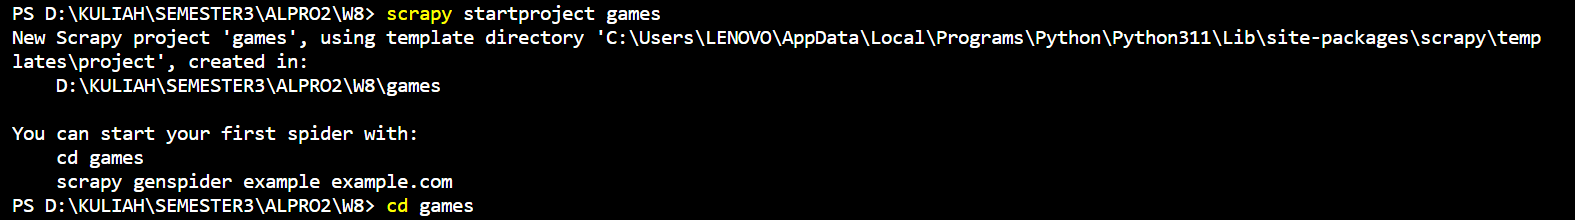

3. buat file baru bernama games_prices.py pada folder games, isi dengan code sebagai berikut 
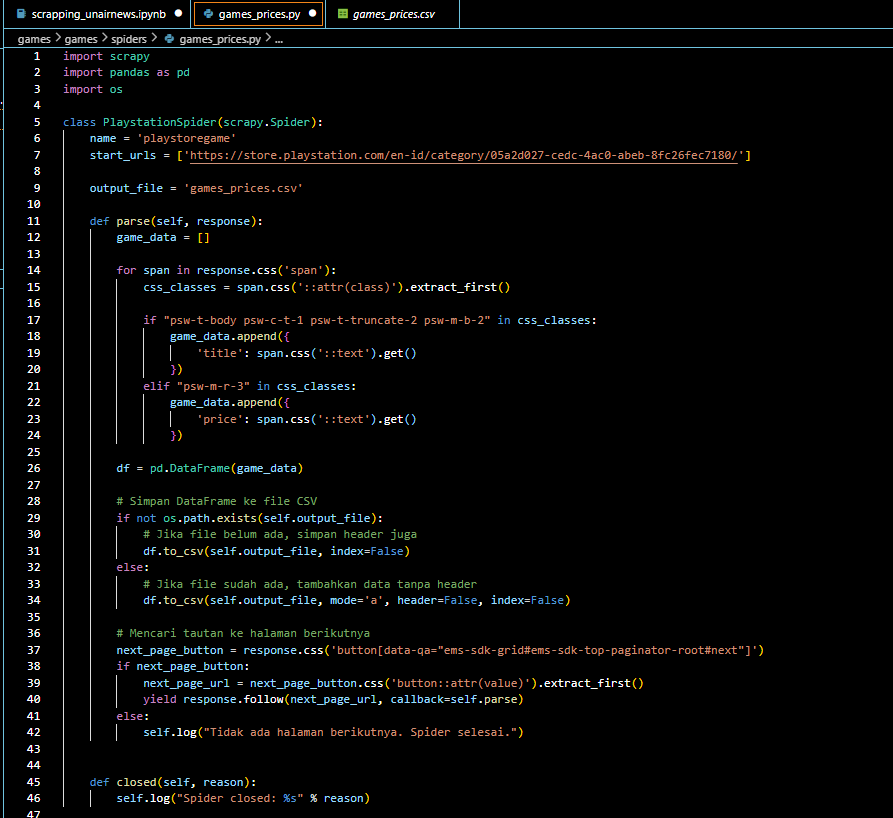

4. Jalankan spider menggunakan perintah scrapy crawl playstoregame, maka hasil crawling akan tersimpan pada file csv games_prices.csv



Hasil semua scrapping dan crawling dapat dilihat di GitHub: https://github.com/nfshk/WebDataAcquisition
